# **Import Libraries and modules**

In [2]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


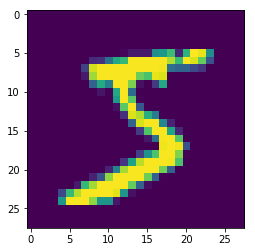

In [5]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [8]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [10]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

# Aim
*   Our aim in to get to 15K params & 99.4 accuracy in 4 code iterations and each iteration having max of 3 changes.
*   From the last iteration, we had 14.5k params and 99.19 test accuracy
*   We had problem of overfitting 
*   Epoch training time as 11secs.
*   Let us add BatchNormalization (#**Chage1**)  and add dropouts ( #**Change2**) of 0.1 to reduce the overfitting problem.
*  We should expect the time to train each epooch will increase because of the added normalization calculations and increase the accuracy along with reducting in overfitting problem.







In [24]:
from keras.layers import Activation
model = Sequential()

model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1))) # 26,26,10, params = 100

model.add(Convolution2D(20, 3, 3, activation='relu')) # 24,24,20, params = 1820
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(20, 3, 3, activation='relu')) # 22,22,20, params = 3620
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2, 2))) # 11,11,20, 

model.add(Convolution2D(10, 1, 1, activation='relu')) # 11,11,10, params = 210
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, activation='relu')) # 9,9,16, params = 1456 
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, activation='relu')) # 7,7,16, params = 2320
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, activation='relu')) # 5,5,16, params = 2320
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, activation='relu')) # 5,5,10, params = 170
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 5)) #1,1,10, params = 2510

model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 20)        1820      
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 20)        80        
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 20)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 20)        3620      
_________________________________________________________________
batch_normalization_2 (Batch (None, 22, 22, 20)        80        
_________________________________________________________________
dropout_2 (Dropout)          (None, 22, 22, 20)        0         
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [14]:
#Added testing data accuracy and loss to verify.
model.fit(X_train, Y_train, batch_size=32, nb_epoch=25, verbose=1, validation_data=(X_test, Y_test))

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 28s 466us/step - loss: 0.2627 - acc: 0.9181 - val_loss: 0.0609 - val_acc: 0.9808
Epoch 2/25
60000/60000 [==============================] - 25s 416us/step - loss: 0.0812 - acc: 0.9743 - val_loss: 0.0424 - val_acc: 0.9865
Epoch 3/25
60000/60000 [==============================] - 24s 401us/step - loss: 0.0644 - acc: 0.9792 - val_loss: 0.0415 - val_acc: 0.9867
Epoch 4/25
60000/60000 [==============================] - 24s 399us/step - loss: 0.0556 - acc: 0.9824 - val_loss: 0.0326 - val_acc: 0.9888
Epoch 5/25
60000/60000 [==============================] - 24s 398us/step - loss: 0.0481 - acc: 0.9846 - val_loss: 0.0311 - val_acc: 0.9904
Epoch 6/25
60000/60000 [==============================] - 25s 414us/step - loss: 0.0461 - acc: 0.9858 - val_loss: 0.0314 - val_acc: 0.9902
Epoch 7/25
60000/60000 [==============================] - 23s 388us/step - loss: 0.0410 - acc: 0.9867 - val_loss: 0.

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [16]:
print(score)

[0.030360687254987716, 0.9903]


# Observations of the result : 

*   We achieved a test accuracy of 99.41% by 23rd epoch.
*   Our training accuracy after 2nd epoch is 98.65% and 3rd epoch is 98.67%, which suggests we are going in the right direction.
*   The time taken for one epoch has increased to 24 secs.



#Batch Size


*   Let us increase the batch size to 64 and see the accuracy. 
*   We should expect the epoch time to reduce as the batch size is increased.



In [26]:
model.fit(X_train, Y_train, batch_size=64, nb_epoch=25, verbose=1, validation_data=(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 15s 255us/step - loss: 0.3310 - acc: 0.8950 - val_loss: 0.0703 - val_acc: 0.9776
Epoch 2/25
60000/60000 [==============================] - 12s 204us/step - loss: 0.0868 - acc: 0.9733 - val_loss: 0.0502 - val_acc: 0.9829
Epoch 3/25
60000/60000 [==============================] - 13s 216us/step - loss: 0.0652 - acc: 0.9797 - val_loss: 0.0471 - val_acc: 0.9837
Epoch 4/25
60000/60000 [==============================] - 13s 212us/step - loss: 0.0558 - acc: 0.9825 - val_loss: 0.0328 - val_acc: 0.9890
Epoch 5/25
60000/60000 [==============================] - 12s 200us/step - loss: 0.0498 - acc: 0.9838 - val_loss: 0.0270 - val_acc: 0.9912
Epoch 6/25
60000/60000 [==============================] - 12s 202us/step - loss: 0.0449 - acc: 0.9860 - val_loss: 0.0282 - val_acc: 0.9906
Epoch 7/25
60000/60000 [==============================] - 12s 199us/step - loss: 0.0427 - acc: 0.9870 - val_loss: 0.

#Observations


*   The test accuracy is 99.41% and each epoch time reduced to 12secs. 



In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [28]:
print(score)

[0.019770071625761193, 0.9941]


In [0]:
y_pred = model.predict(X_test)

In [21]:
print(y_pred[:9])
print(y_test[:9])

[[9.80217504e-11 2.00128158e-09 1.47066581e-08 1.87542515e-08
  1.48354853e-13 9.51079753e-12 1.63478121e-14 1.00000000e+00
  2.20215816e-12 3.50821394e-09]
 [5.29584696e-08 3.31501866e-07 9.99999642e-01 1.28488817e-10
  6.06020301e-09 2.40327344e-13 9.88656268e-09 1.30137491e-12
  4.77396317e-11 8.99458841e-10]
 [2.24784236e-11 9.99997973e-01 2.09796998e-08 1.40529685e-10
  1.91160581e-07 3.44682644e-10 3.57550212e-10 1.88268803e-06
  2.97560365e-10 5.14705334e-10]
 [9.99999523e-01 5.40510324e-14 1.29213606e-09 3.02800528e-11
  3.38596963e-11 2.87199264e-10 4.56667436e-07 1.82483872e-11
  2.67946043e-09 1.70693470e-09]
 [3.78928250e-10 5.99306854e-11 4.62713093e-14 2.27934100e-12
  9.99999881e-01 1.39207743e-11 1.18808163e-08 2.29948994e-11
  2.34069101e-12 1.15095574e-07]
 [1.25701376e-11 9.99998093e-01 4.94228170e-09 1.05943891e-11
  3.44860780e-07 2.68083923e-11 2.02999478e-10 1.60703325e-06
  3.60550964e-11 3.90324939e-10]
 [3.19850049e-11 5.66222980e-07 7.43572599e-08 1.85768566e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [23]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_16'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored